## 2. Data

#### The data used for this study was obtained from Seattle's Department of Transportation.

The data used is from Seattle's Collision GIS (Geographic Information System), a computer system used for capturing, storing and displaying data related to positions on Earth's surface. The data is from 2004 to the present and contains various features such as location, the severity of the collision, number of vehicles/cyclists/pedestrians involved, date/time of incident, weather, road conditions and more. There are almost 200,000 collisions in the dataset and 38 features. While some of the features won't be useful or have many missing values, the ones that I will explore in more detail will be:
* Severity Code - this will be the target that we'll compare the features' impact on.
* Severity Description - description of the severity codes.
* X and Y values (coordinates) - are there areas where collisions are more concentrated?
* Address Type - alley, block or intersection of collision.
* Collision Type - 10 types of collisions such as parked car, angles, rear end, pedestrian, etc.
* Person Count - # of people involved in collision.
* Pedestrian Count - # of pedestrians involved in collision.
* Cyclist Count - # of cyclists involved in collision.
* Vehicle count - # of vehicles involved in collision.
* Date/Time - are number of or severity of collisions more likely to occur on certain days or times?
* Junction Type - 7 types describing collision at intersection, mid-block, driveway and whether collision is related to intersection.
* Seattle Collision Code - Seattle codes to describe each collision.
* Seattle Collision Description - description of Seattle collision codes.
* Under Influence - was alcohol or drugs involved?
* Weather - do more collisions occur because of adverse weather?
* Road Conditions - do more collisions occur because of adverse road conditions?
* Light Conditions - do more collisions occur because of adverse light conditions?
* State Collision Code - 84 codes the state uses to descibe each collision.
* State Collision Description - description of state collision codes.
* Hit Parked Car - was a parked car involved in the collision?

In the following section I will use graphs to gain insight into the data, and decide which features will be useful when predicting injuries when these collisions occur.

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
# load data into dataframe and look at first 5 collisions

pd.set_option('display.max_columns', None)
df = pd.read_csv(body, low_memory=False)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
print('Number of Features:', df.shape[1])
print('Number of Recorded Collisions:', df.shape[0])

Number of Features: 38
Number of Recorded Collisions: 194673


In [5]:
# check number of missing values for each feature

df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [6]:
def bar_plot(data_column, x_label, y_label, title, size=(12,8), rotate=0):
    a = data_column.value_counts()
    codes = a.index
    count = a.values
    plt.figure(figsize=size)
    ax = sns.barplot(x = codes, y=count)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_title(title, fontsize=22)
    plt.xticks(rotation=rotate)
    plt.show()

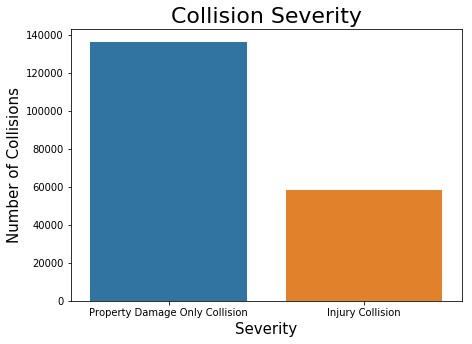

In [7]:
bar_plot(df['SEVERITYDESC'], 'Severity', 'Number of Collisions', 'Collision Severity', size=(7,5))

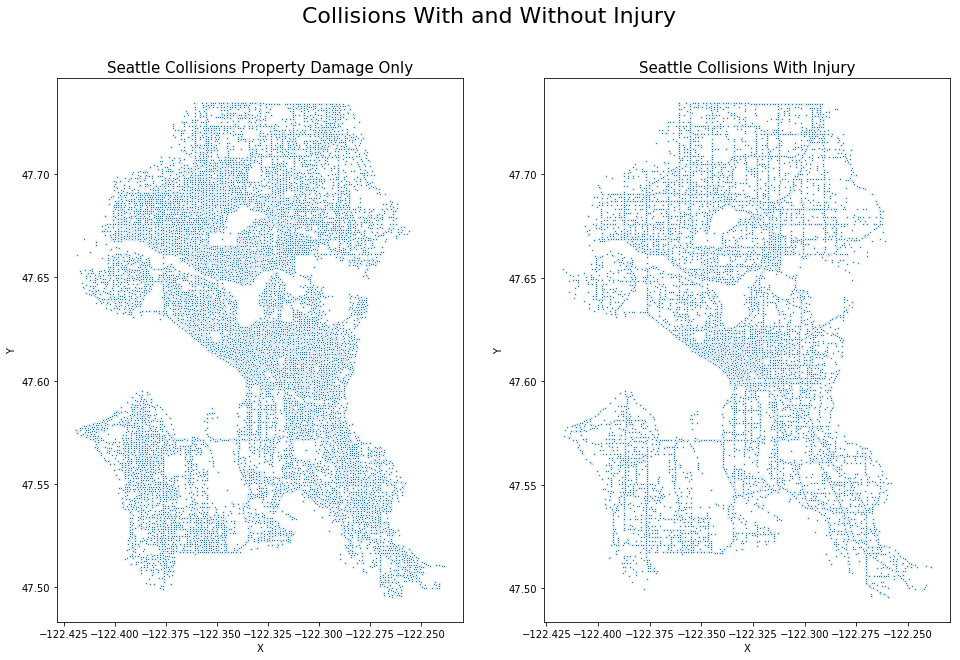

In [8]:
property_damage_df = df.loc[df['SEVERITYCODE']==1]
injury_df = df.loc[df['SEVERITYCODE']==2]
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,10))
fig.suptitle('Collisions With and Without Injury', fontsize=22)
ax1 = sns.scatterplot(x=property_damage_df['X'], y=property_damage_df['Y'], s=5, ax=ax1)
ax1.set_title('Seattle Collisions Property Damage Only', fontsize=15)
ax2 = sns.scatterplot(x=injury_df['X'], y=injury_df['Y'], s=5, ax=ax2)
ax2.set_title('Seattle Collisions With Injury', fontsize=15);

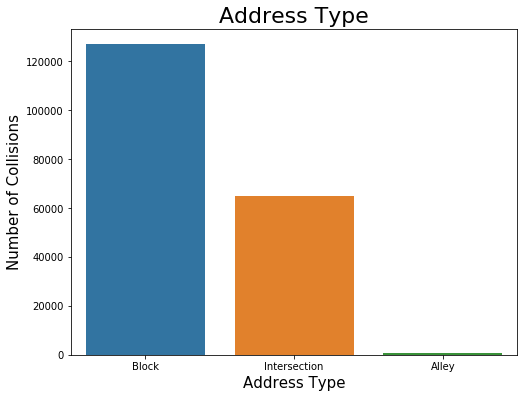

In [9]:
bar_plot(df['ADDRTYPE'], 'Address Type', 'Number of Collisions', 'Address Type', size=(8,6))

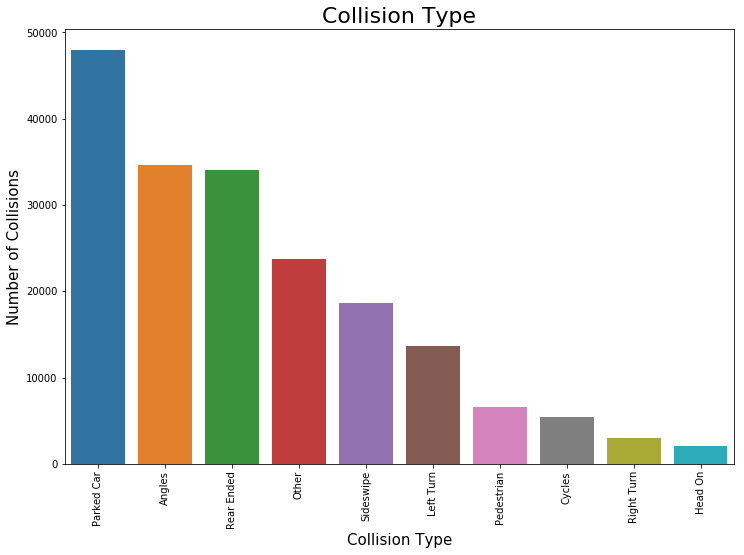

In [10]:
bar_plot(df['COLLISIONTYPE'], 'Collision Type', 'Number of Collisions', 'Collision Type', rotate=90)

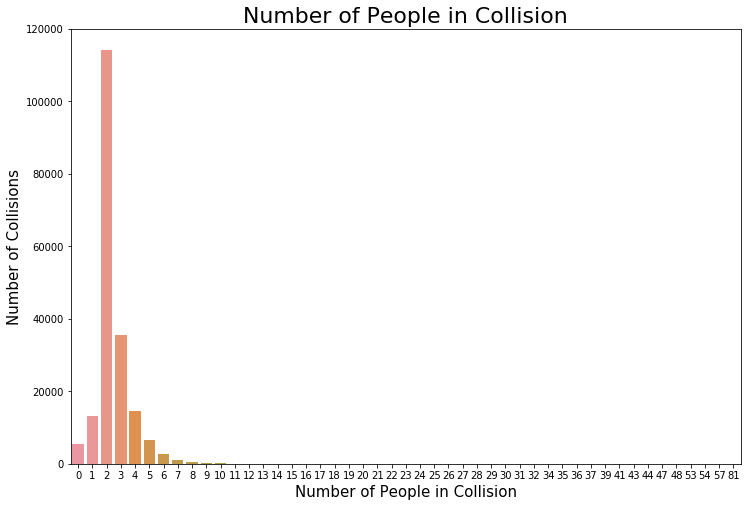

In [11]:
bar_plot(df['PERSONCOUNT'], 'Number of People in Collision', 'Number of Collisions', 'Number of People in Collision')

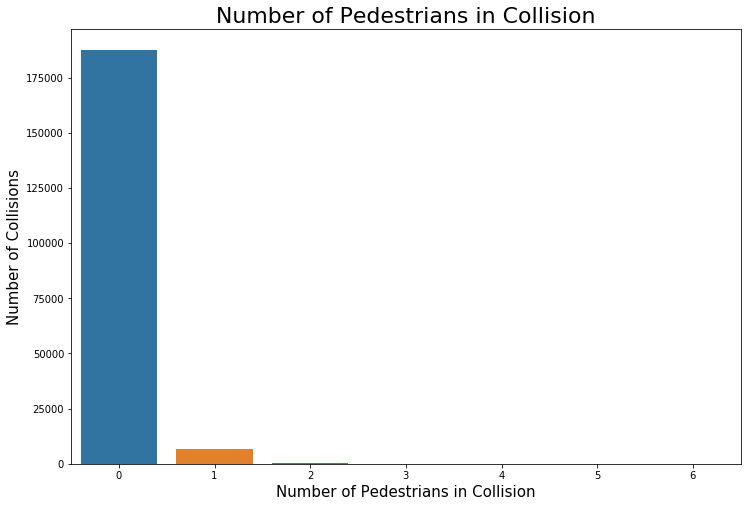

In [12]:
bar_plot(df['PEDCOUNT'], 'Number of Pedestrians in Collision', 'Number of Collisions', 'Number of Pedestrians in Collision')

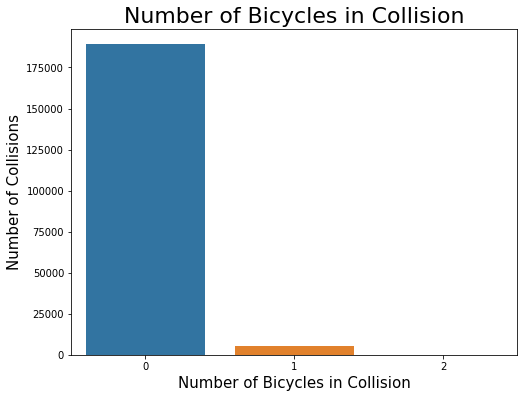

In [13]:
bar_plot(df['PEDCYLCOUNT'], 'Number of Bicycles in Collision', 'Number of Collisions', 'Number of Bicycles in Collision', size=(8,6))

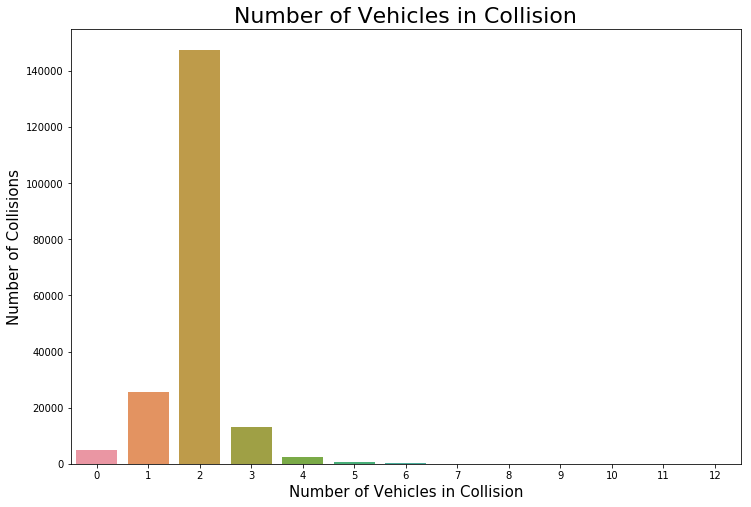

In [14]:
bar_plot(df['VEHCOUNT'], 'Number of Vehicles in Collision', 'Number of Collisions', 'Number of Vehicles in Collision')

In [15]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'], infer_datetime_format=True)
df['Year'] = df['INCDTTM'].dt.year
df['Month'] = df['INCDTTM'].dt.month
df['Day'] = df['INCDTTM'].dt.weekday

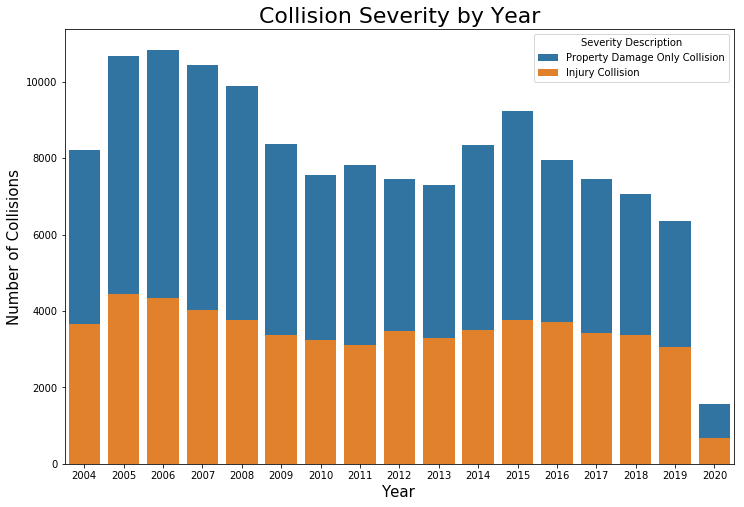

In [16]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Year', hue='SEVERITYDESC', data=df,
                   hue_order=['Property Damage Only Collision', 'Injury Collision'], dodge=False)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Number of Collisions', fontsize=15)
ax.set_title('Collision Severity by Year', fontsize=22)
ax.legend(title='Severity Description');

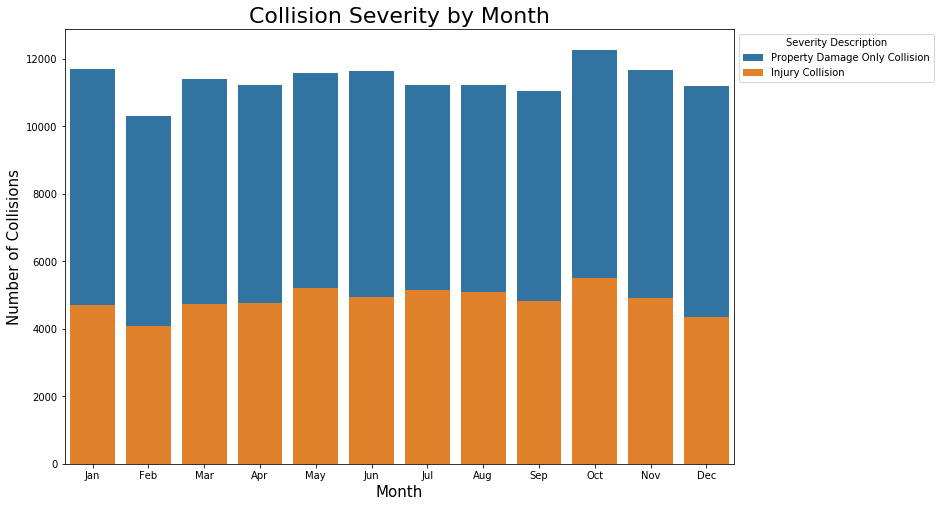

In [17]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Month', hue='SEVERITYDESC', data=df,
                   hue_order=['Property Damage Only Collision', 'Injury Collision'], dodge=False)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Number of Collisions', fontsize=15)
ax.set_title('Collision Severity by Month', fontsize=22)
ax.set_xticklabels(months)
ax.legend(title='Severity Description', bbox_to_anchor=(1,1));

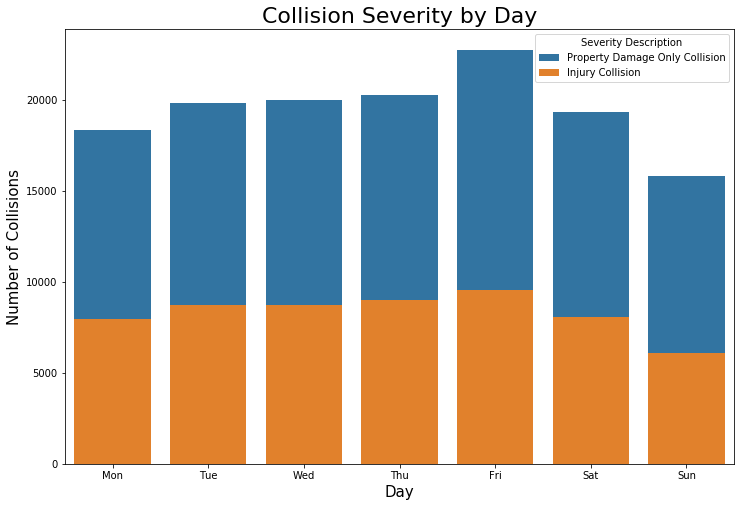

In [18]:
days=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Day', hue='SEVERITYDESC', data=df,
                   hue_order=['Property Damage Only Collision', 'Injury Collision'], dodge=False)
ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel('Number of Collisions', fontsize=15)
ax.set_title('Collision Severity by Day', fontsize=22)
ax.set_xticklabels(days)
ax.legend(title='Severity Description');

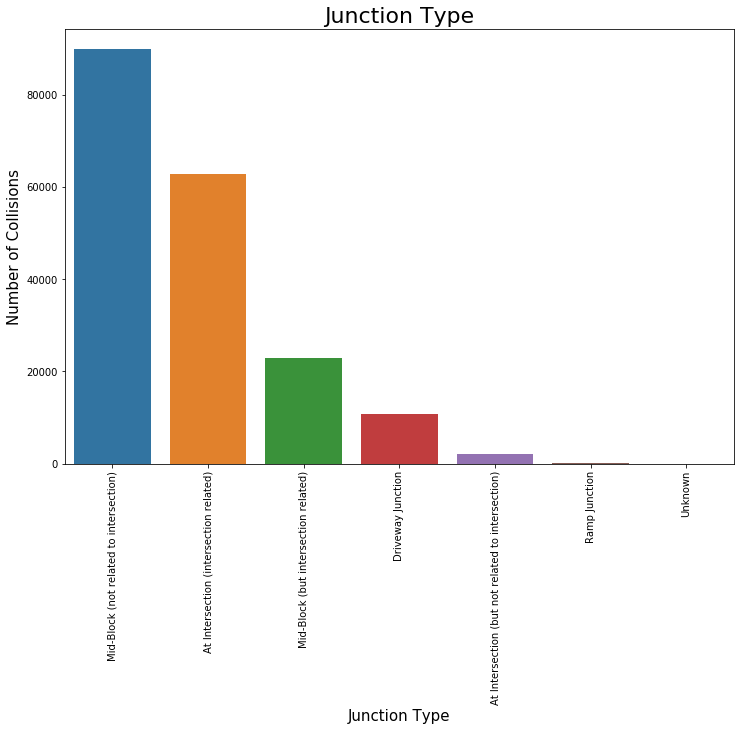

In [19]:
bar_plot(df['JUNCTIONTYPE'], 'Junction Type', 'Number of Collisions', 'Junction Type', rotate=90)

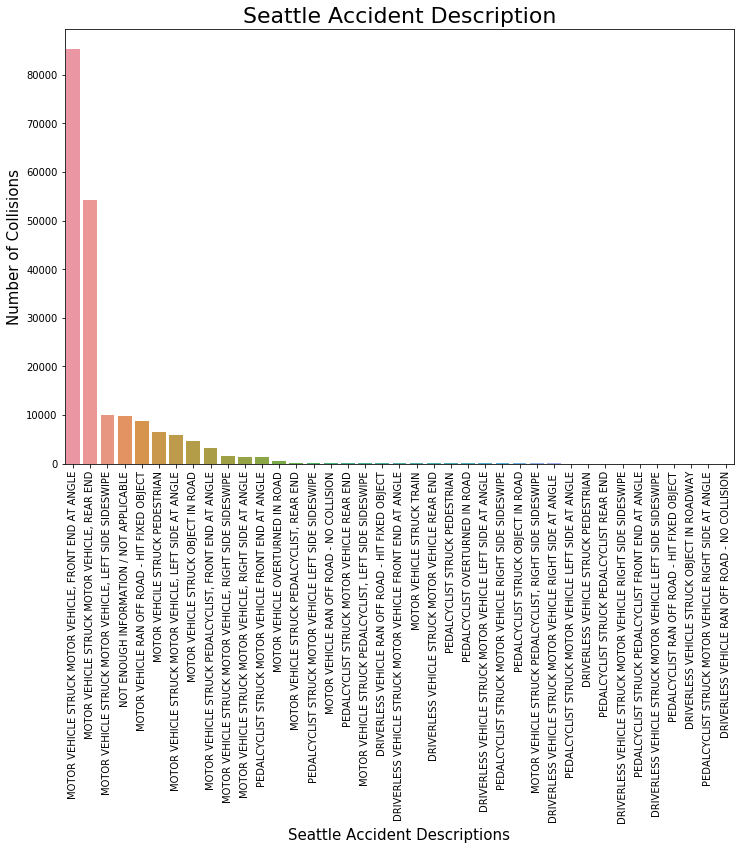

In [20]:
bar_plot(df['SDOT_COLDESC'], 'Seattle Accident Descriptions', 'Number of Collisions', 'Seattle Accident Description', rotate=90)

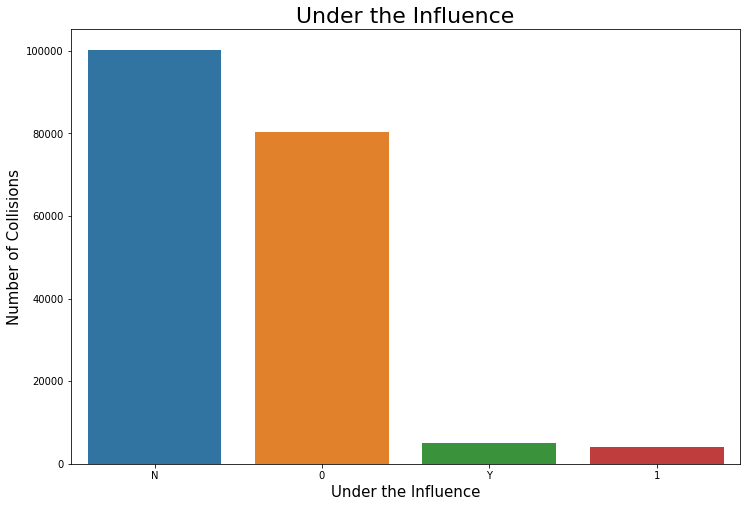

In [21]:
bar_plot(df['UNDERINFL'], 'Under the Influence', 'Number of Collisions', 'Under the Influence')

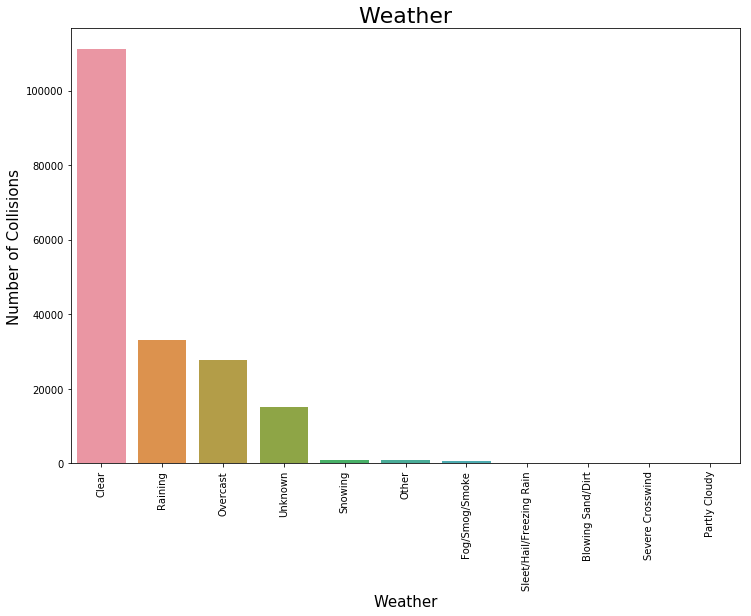

In [22]:
bar_plot(df['WEATHER'], 'Weather', 'Number of Collisions', 'Weather', rotate=90)

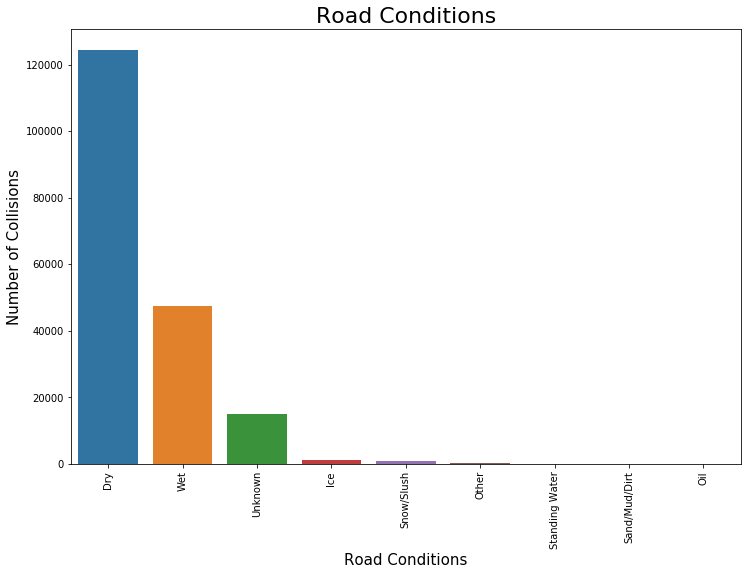

In [23]:
bar_plot(df['ROADCOND'], 'Road Conditions', 'Number of Collisions', 'Road Conditions', rotate=90)

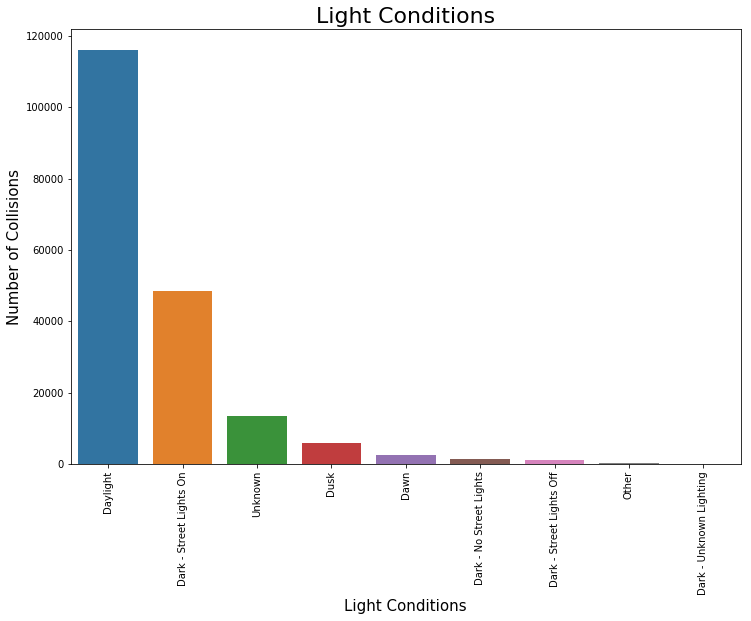

In [24]:
bar_plot(df['LIGHTCOND'], 'Light Conditions', 'Number of Collisions', 'Light Conditions', rotate=90)

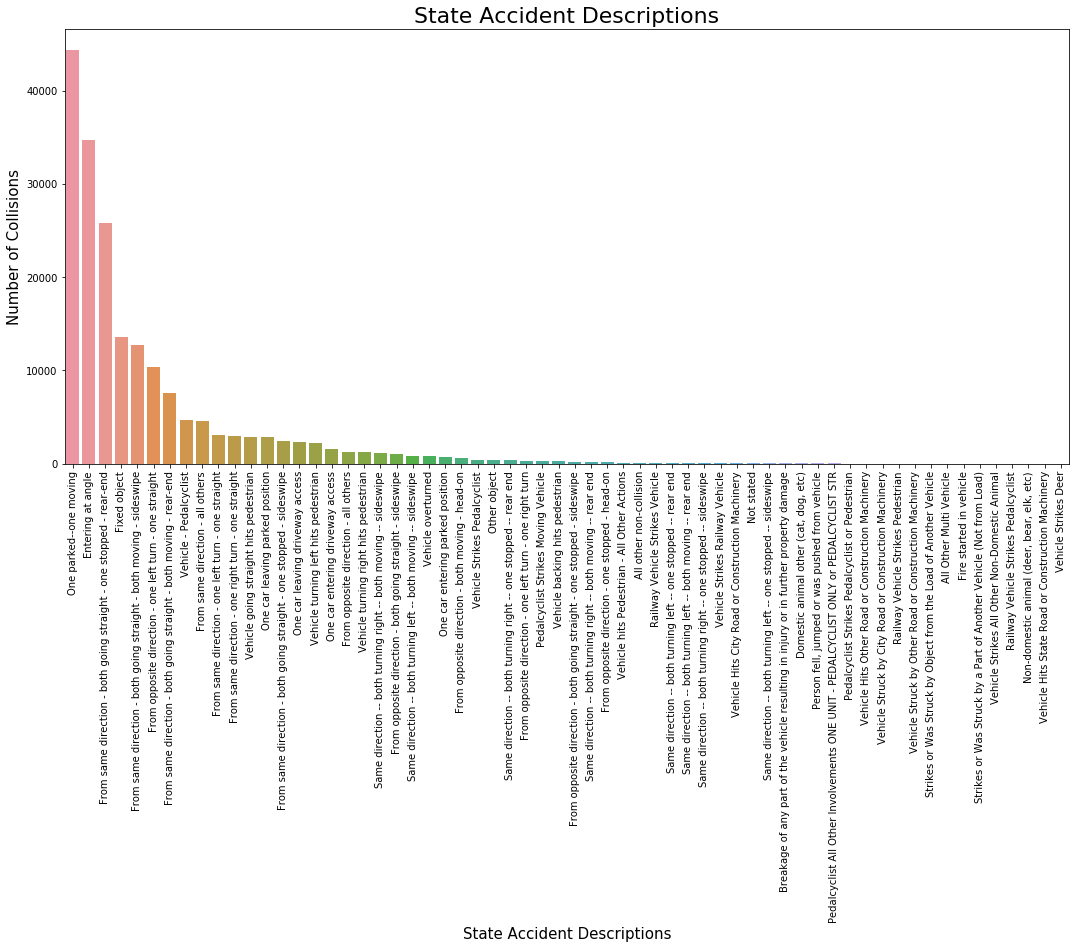

In [25]:
bar_plot(df['ST_COLDESC'], 'State Accident Descriptions', 'Number of Collisions', 'State Accident Descriptions', size=(18,8), rotate=90)

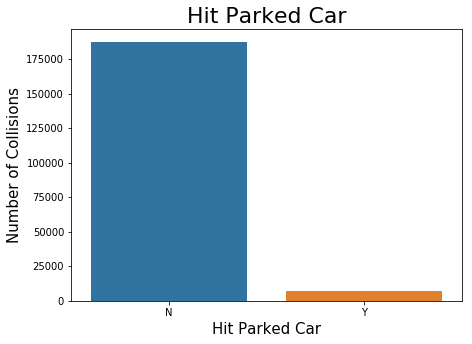

In [26]:
bar_plot(df['HITPARKEDCAR'], 'Hit Parked Car', 'Number of Collisions', 'Hit Parked Car', size=(7,5))

After looking at the graphs, here are some observations about the data:
* There are far more collisions involving property damage only versus injury.
* The collisions involving injury tend to happen in and around the downtown area and major highways, whereas the collisions without injury are evenly distributed.
* Collisions occur more often in the blocks rather than intersections. Almost none happened in alleys.
* Most collision types are with parked cars. Angles and rear end collisions are also common.
* The most common number of people involved in collisions is 2.
* It is rare for a collision to involve pedestrians or cyclists.
* Most collisions involve 2 vehicles.
* Although the number of collisions have fluctuated over the last 16 years, it appears to be trending down. The recession between 2007-2009 and the growth that followed afterwards may have had an impact.
* The number of collisions tend to go up slightly in October and down slightly in February.
* The number of collisions tend to go up slightly on Fridays and down slightly on Sundays.
* Most collisions do not involve alcohol or drugs.
* Most collisions occur when the weather is clear, the roads are dry and it is daytime.
* The 'hit parked car' feature contradicts the 'collision type' feature.

Most of the data appears consistent. It is surprising that most accidents occur when conditions are good. This leads me to believe that many accidents are from carelessness or poor traffic infrastructure. Seattle does seem to be making some progress towards their Vision Zero plan, but have far to go. Some of the most relevant features to predict collision severity may be location, address type and collision type. Also, since most days in Seattle are marked with overcast skies, good weather and dry conditions may also be good features to use for predicting collision severity.